In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from pandas.tools.plotting import scatter_matrix
from IPython.display import clear_output

In [3]:
# Calculate root mean squared error
def RMSE(groundTruth,predictions):
    error_squeare=(groundTruth-predictions)**2
    MSE=np.mean(error_squeare)
    RMSE=np.sqrt(MSE)
    return RMSE
    

In [ ]:
#1. CRIM: per capita crime rate by town
#2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#3. INDUS: proportion of non-retail business acres per town
#4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#5. NOX: nitric oxides concentration (parts per 10 million)
#6. RM: average number of rooms per dwelling
#7. AGE: proportion of owner-occupied units built prior to 1940
#8. DIS: weighted distances to ve Boston employment centers
#9. RAD: index of accessibility to radial highways
#10. TAX: full-value property-tax rate per $10,000
#11. PTRATIO: pupil-teacher ratio by town
#12. B: 1000(Bk 􀀀 0:63)2 where Bk is the proportion of blacks by town
#13. LSTAT: % lower status of the population
#14. MEDV: Median value of owner-occupied homes in $1000s    

In [4]:
filename="E:/rt/reusablecodes/LinearRegression/housing.csv"

#colum names for the dataset
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
#data in the file is seperated with whitespace
dataset = pd.read_csv(filename,delim_whitespace=True,names=colnames)


print dataset.shape
# check datatypes for any wrong datatypes
print(dataset.dtypes)
print dataset.head()

# descriptions;summarize the distribution of each attribute.
pd.set_option('precision', 1)
print(dataset.describe())

# correlation matrix
pd.set_option('precision', 2)
print(dataset.corr(method='pearson'))





(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS  

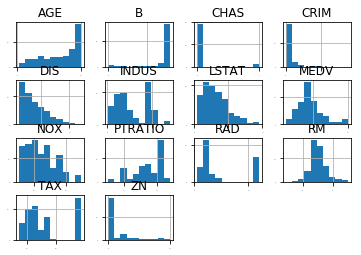

In [5]:
#describe the model with visualization 

# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()




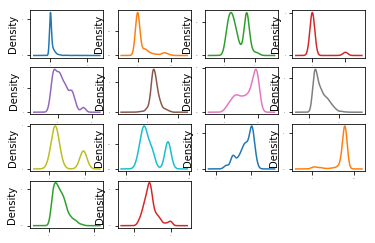

In [6]:
# density plot
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
plt.show()




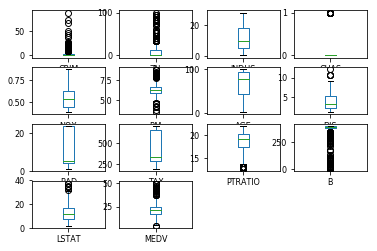

In [7]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
plt.show()



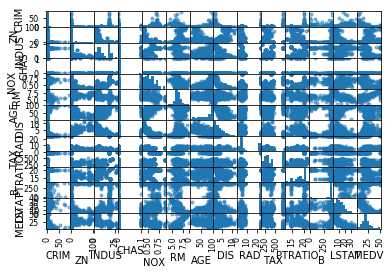

In [8]:
#Multimodal Data Visualizations
# scatter plot matrix

scatter_matrix(dataset)
plt.show()



In [9]:
#typecasting into int to avoid fractions 
train_size=int(dataset.shape[0]*.7)
print "train size: ",train_size

train size:  354


In [10]:
#use trainDataset for training the model
trainDataset = dataset[:train_size]
#use testDataset for testing the model
testDataset = dataset[train_size:]
print "dataset shape ",dataset.shape
print "trainDataset shape ",trainDataset.shape
print "testDataset shape ",testDataset.shape

dataset shape  (506, 14)
trainDataset shape  (354, 14)
testDataset shape  (152, 14)


In [11]:
#convert into numpy array
np_train=trainDataset.values

#split input features and output
train_input_features=np_train[:,0:13]
train_output=np_train[:,13]
print train_input_features[0:5,:]
print train_output[0:5]




[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]
 [  3.23700000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.58000000e-01   6.99800000e+00   4.58000000e+01   6.06220000e+00
    3.00000000e+00   2.22000000e+02   1.87000000e+01   3.94630000e+02
    2.94000000e+00]
 [  6.90500000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.5800

In [12]:
#convert into numpy array on test dataset
np_test=testDataset.values

#split input features and output
test_input_features=np_test[:,0:13]
test_output=np_test[:,13]
print test_input_features[0:5,:]
print test_output[0:5]



[[  4.30100000e-02   8.00000000e+01   1.91000000e+00   0.00000000e+00
    4.13000000e-01   5.66300000e+00   2.19000000e+01   1.05857000e+01
    4.00000000e+00   3.34000000e+02   2.20000000e+01   3.82800000e+02
    8.05000000e+00]
 [  1.06590000e-01   8.00000000e+01   1.91000000e+00   0.00000000e+00
    4.13000000e-01   5.93600000e+00   1.95000000e+01   1.05857000e+01
    4.00000000e+00   3.34000000e+02   2.20000000e+01   3.76040000e+02
    5.57000000e+00]
 [  8.98296000e+00   0.00000000e+00   1.81000000e+01   1.00000000e+00
    7.70000000e-01   6.21200000e+00   9.74000000e+01   2.12220000e+00
    2.40000000e+01   6.66000000e+02   2.02000000e+01   3.77730000e+02
    1.76000000e+01]
 [  3.84970000e+00   0.00000000e+00   1.81000000e+01   1.00000000e+00
    7.70000000e-01   6.39500000e+00   9.10000000e+01   2.50520000e+00
    2.40000000e+01   6.66000000e+02   2.02000000e+01   3.91340000e+02
    1.32700000e+01]
 [  5.20177000e+00   0.00000000e+00   1.81000000e+01   1.00000000e+00
    7.7000

In [13]:
lreg_model=LinearRegression()              #initialize the model
lreg_model.fit(train_input_features,train_output)            #Train the model

print "slope: ",lreg_model.coef_
print "intercept: ",lreg_model.intercept_



slope:  [ 1.29693856  0.01469497  0.04050457  0.79060732 -9.12933243  9.24839787
 -0.0451214  -0.91395374  0.14079658 -0.01477291 -0.63369567  0.01577172
 -0.09514128]
intercept:  -13.6721465522


In [25]:
#calculate R square (coefficient of determination) on training data
#the higher the R-square is , the better the model is
print lreg_model.score(train_input_features,train_output)

#calculate SSE (sum of squared error)
print "SSE(sum of squared error): ",lreg_model.residues_

#Calculate RMSE for trained data

print "RMSE on Training data:", RMSE(lreg_model.predict(train_input_features),train_output)

0.873281645658
SSE(sum of squared error):  3184.36540606
RMSE on Training data: 2.99923031843


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


array([ 15.38101077])

In [52]:
#Testing/Validation of the Model using test data

#calculate R square (coefficient of determination) on test data
#the higher the R-square is , the better the model is

print lreg_model.score(test_input_features,test_output)



In [28]:
# Calculate root mean squared error
def RMSE(groundTruth,predictions):
    error_squeare=(groundTruth-predictions)**2
    MSE=np.mean(error_squeare)
    RMSE=np.sqrt(MSE)
    return RMSE
    
    